In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
from os.path import join
import sys
import h5py
import pandas as pd
import pickle
from time import time
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('classic')
from tqdm import tqdm
from scipy.io import loadmat
from utils import *

In [4]:
ROOT = join('/home','ansuini','repos','Decoding')
sys.path.append(join(ROOT))
os.chdir(join(ROOT,'notebooks') )
results_folder = join(ROOT, 'results')

# Stimulus Features

### Parse stimulus features

In [7]:
stimFeatures = parseStimFeatures()

In [8]:
print(stimFeatures.keys())

dict_keys(['luminosity', 'area', 'objid', 'posx', 'posy', 'eccentricity', 'orientation'])


# Units resume

In [13]:
printResume()

Controls
SU  :  [52, 6]
MUA :  [288, 96]
ALL :  [340, 102]

Experimentals
SU  :  [31, 105]
MUA :  [156, 254]
ALL :  [187, 359]

Naive
SU  :  [46, 82]
MUA :  [145, 279]
ALL :  [191, 361]



# Data exploration : mean and standard deviation of firing rates matrices


We have three categories of data:

- Controls
- Naive
- Experimentals

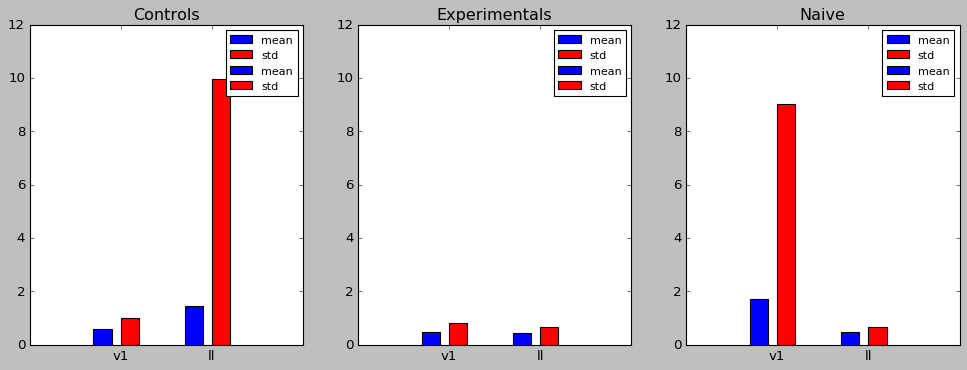

In [47]:
target_areas = ['v1','ll']
typeunit = 'all'
offset = 0.3
fs = 10

fig = plt.figure(figsize=(15,5))
count0 = 0
for exp in Experiments:
    count0 += 1
    plt.subplot(1,3,count0)
    count1 = 0
    for area in target_areas:
        count1 += 1
        
        x = loadFiringRates(exp,area,typeunit)
        #observable
        
        
        o1 = np.mean(x)
        o2 = np.std(x)
        
        
        plt.bar(count1 - offset, o1 ,0.2, color='b',label='mean')
        plt.bar(count1 , o2 ,0.2, color='r',label='std')
        
        plt.xlim(0,3)
        plt.ylim(0,12)
    plt.xticks([1,2],target_areas)
    
    plt.title(exp)
    plt.legend(fontsize=fs)
    
plt.savefig('exp1_' + typeunit +  '.png')